<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/01_Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [4]:
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())
#The last command will be deprecated so better to use the following command to check the GPU availability
print(tf.config.list_physical_devices('GPU'))

2.1.0-rc1
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [0]:
# imutils library use to import the dataset from a url
from imutils import paths
# tqdm used to show progress in an operation (e.g. moving images to train and test sets)
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import cv2
import os

In [7]:
# Get the flowers-17 dataset
flowers = tf.keras.utils.get_file('flower_photos',
                                  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                  untar=True)

228818944/228813984 [==============================] - 5s 0us/step


In [8]:
# check the directory and the folders/labels of the dataset
!ls {flowers}

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [9]:
# Give me the length of the list of paths.list_images in the directory flowers
total_data = len(list(paths.list_images(flowers)))
total_data

3670

In [10]:
# list of paths.list_images
image_paths = list(paths.list_images(flowers))
# show the first 5 paths from the list
image_paths[:5]

['/root/.keras/datasets/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/8524505868_236f4c94b5.jpg',
 '/root/.keras/datasets/flower_photos/roses/4951581805_b049304f1b_n.jpg',
 '/root/.keras/datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg']

In [11]:
# shuffle the image paths and preview
random.shuffle(image_paths)
image_paths[:5]

['/root/.keras/datasets/flower_photos/dandelion/1195255751_d58b3d3076.jpg',
 '/root/.keras/datasets/flower_photos/roses/8524505546_b242bd4928_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/35477171_13cb52115c_n.jpg',
 '/root/.keras/datasets/flower_photos/daisy/3474942718_c418dae6f1.jpg',
 '/root/.keras/datasets/flower_photos/tulips/779359602_30abcbf5bb_n.jpg']

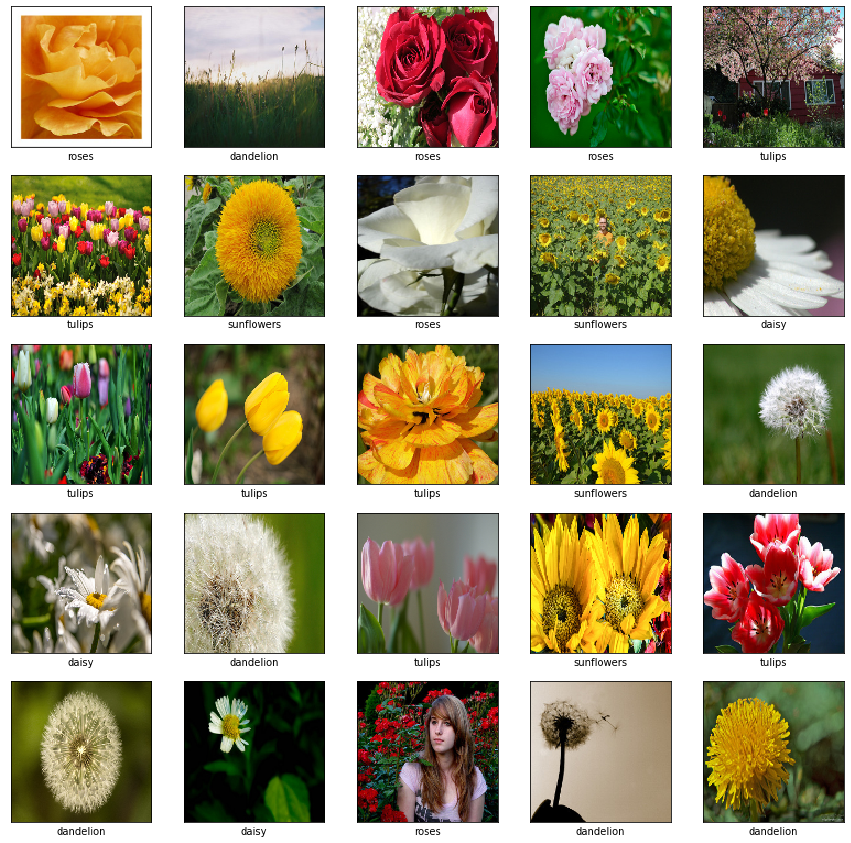

In [15]:
# size of the figure i want to print
plt.figure(figsize=(15,15))
# number of images I want to plot 25
for i in range(25):
  # choose a random path from the list image_paths
  image_path = np.random.choice(image_paths)
  #read the image paths
  image = plt.imread(image_path)
  #resize
  image = cv2.resize(image, (128, 128))
  # obtaing the label from the path
  label = image_path.split("/")[5]
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(True)
  # show image
  plt.imshow(image)
  plt.xlabel(label)
plt.show()

In [0]:
# Split images in train and test
nb_test_images = int(len(list(paths.list_images(flowers)))*0.15)
nb_train_images = len(list(paths.list_images(flowers))) - nb_test_images

In [0]:
# directory paths
train_dir = "train"
test_dir = "test"

In [0]:
# Function to move the images to their corresponding directory
def move_images(nb_images, output_dir):
  for i in tqdm(range(nb_images)):
    #grab an image from the image_paths list and the label of the image
    image_path = image_paths[i]
    label = image_path.split("/")[5]

    new_image_dir = os.path.join(output_dir, label)
    if not os.path.exists(new_image_dir):
      os.makedirs(new_image_dir)
    
    #copy the current image to the respective folder including the metadata
    shutil.copy2(image_path, new_image_dir)

In [19]:
# move the images to the train and test set
move_images(nb_test_images, test_dir)
move_images(nb_train_images, train_dir)

100%|██████████| 3120/3120 [00:00<00:00, 4769.10it/s]


In [21]:
# to check the files in each directory
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 7 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (51.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

In [22]:
!tree --dirsfirst --filelimit 10 train

train
├── daisy [550 entries exceeds filelimit, not opening dir]
├── dandelion [777 entries exceeds filelimit, not opening dir]
├── roses [532 entries exceeds filelimit, not opening dir]
├── sunflowers [605 entries exceeds filelimit, not opening dir]
└── tulips [656 entries exceeds filelimit, not opening dir]

5 directories, 0 files


In [23]:
!tree --dirsfirst --filelimit 10 test

test
├── daisy [93 entries exceeds filelimit, not opening dir]
├── dandelion [130 entries exceeds filelimit, not opening dir]
├── roses [100 entries exceeds filelimit, not opening dir]
├── sunflowers [104 entries exceeds filelimit, not opening dir]
└── tulips [123 entries exceeds filelimit, not opening dir]

5 directories, 0 files
